In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

## 数据参数

In [2]:
path = '/Users/zhangxiao/Desktop/Jupyter/统计机器学习实验/实验1/iris.data'
df = pd.read_csv(path)
ID = [i+1 for i in range(len(df))]
df.insert(0,'ID', ID)
df['species'] = df.species.str.replace('Iris-', '')
df

,ID,SepalLength,SepalWidth,PetalLength,PetalWidth,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


df.shape

In [3]:
data = np.array(df.iloc[:, 1:])# 将dataframe格式转化为ndarray格式

In [4]:
#sepal length
print("花萼长的均值是:{:.2f}".format(np.mean(data[:, 0], axis=0)))
print("花萼长的最大值是:{:}".format(np.max(data[:, 0]), axis=0))
print("花萼长的最小值是:{:}".format(np.min(data[:, 0]), axis=0))

花萼长的均值是:5.84
花萼长的最大值是:7.9
花萼长的最小值是:4.3


In [5]:
#seple width
print("花萼宽的均值是:{:.2f}".format(np.mean(data[:, 1], axis=0)))
print("花萼宽的最大值是:{:}".format(np.max(data[:, 1]), axis=0))
print("花萼宽的最小值是:{:}".format(np.min(data[:, 1]), axis=0))

花萼宽的均值是:3.05
花萼宽的最大值是:4.4
花萼宽的最小值是:2.0


In [6]:
#petal length
print("花瓣长的均值是:{:.2f}".format(np.mean(data[:, 2], axis=0)))
print("花瓣长的最大值是:{:}".format(np.max(data[:, 2]), axis=0))
print("花瓣长的最小值是:{:}".format(np.min(data[:, 2]), axis=0))

花瓣长的均值是:3.76
花瓣长的最大值是:6.9
花瓣长的最小值是:1.0


In [7]:
#petal width
print("花瓣宽的均值是:{:.2f}".format(np.mean(data[:, 3], axis=0)))
print("花瓣宽的最大值是:{:}".format(np.max(data[:, 3]), axis=0))
print("花瓣宽的最小值是:{:}".format(np.min(data[:, 3]), axis=0))

花瓣宽的均值是:1.20
花瓣宽的最大值是:2.5
花瓣宽的最小值是:0.1


## 数据可视化

In [8]:
#sns初始化
sns.set()

Text(0.5, 1, 'SepalLength and SepalWidth data by Species')

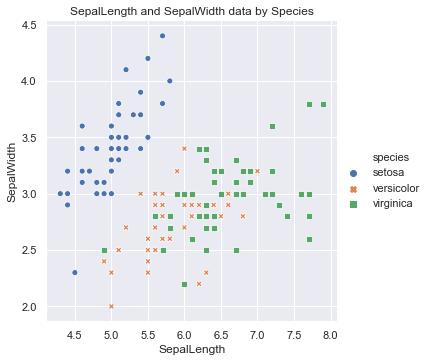

In [9]:
#以花萼长花萼宽两个属性做散点图
sns.relplot(x='SepalLength', y='SepalWidth', hue='species', style='species', data=df)
plt.title('SepalLength and SepalWidth data by Species')

Text(0.5, 1, 'PetalLength and PetalWidth data by Species')

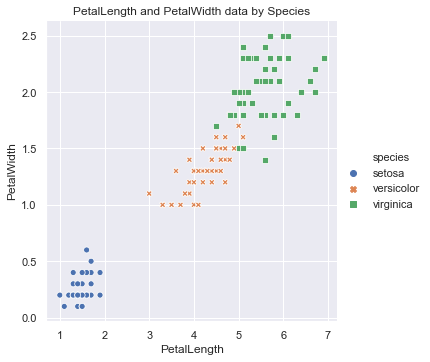

In [10]:
#以花瓣长花瓣宽两个属性做散点图
sns.relplot(x='PetalLength', y='PetalWidth', hue='species', style='species', data=df )
plt.title('PetalLength and PetalWidth data by Species')

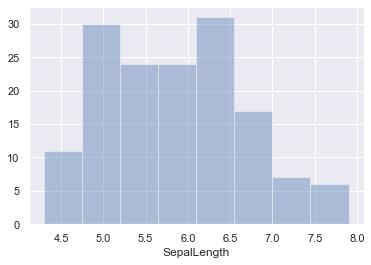

In [11]:
sns.distplot(df.SepalLength, hist=True, kde=False)#自动划分以0.45为区间划分

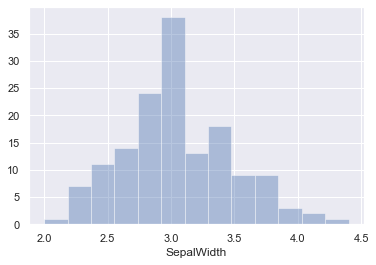

In [12]:
sns.distplot(df.SepalWidth, hist=True, kde=False)#以0.18为区间划分

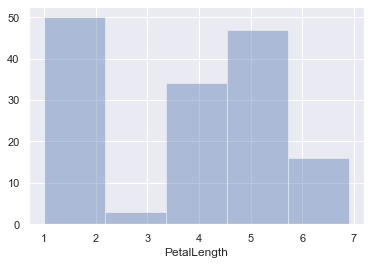

In [13]:
sns.distplot(df.PetalLength, hist=True, kde=False)

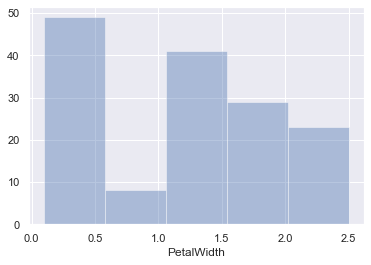

In [14]:
sns.distplot(df.PetalWidth, hist=True, kde=False)

### 支持向量机（SVM）

In [15]:
from sklearn.svm import SVC

In [16]:
# 构造数据
def createData():
    data = np.array(df.iloc[:, 1:])
    return data[:, :4], data[:, -1]
X, y = createData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)# 随机数种子，填1每次运行实验
print(X_train, y_train)
print(y_train.shape)#得到的划分是一样的

[[6.1 3.0 4.6 1.4]
 [7.7 3.0 6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.0 1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.0 5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.0 2.2 5.0 1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.0 3.6 1.4 0.2]
 [4.8 3.0 1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.0 3.4 4.5 1.6]
 [7.7 2.8 6.7 2.0]
 [5.7 3.0 4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.0 2.0]
 [6.3 2.7 4.9 1.8]
 [4.8 3.0 1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.0 4.9 1.8]
 [6.5 3.2 5.1 2.0]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.0 3.0 4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.0 2.2 4.0 1.0]
 [6.4 2.9 4.3 1.3]
 [6.5 3.0 5.5 1.8]
 [5.0 2.3 3.3 1.0]
 [6.3 3.3 6.0 2.5]
 [5.5 2.5 4.0 1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 4.1 1.

In [17]:
# 标准化
transfer= StandardScaler() 
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)

In [18]:
# 预估器
estimator = SVC(gamma='auto')

In [19]:
estimator.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
# 模型评估
# 1.调用模型socre方法得出准确率，用测试集来评估
print("模型测试准确率:{:.2%}".format(estimator.score(X_test, y_test)))

模型测试准确率:96.67%


In [21]:
# 2.使用交叉验证，用训练集中的验证集来评估
scores = cross_val_score(estimator, X_train, y_train, cv=10)  #cv=10为10折交叉验证。
print("交叉验证模型训练准确率:\n", scores.reshape(5, 2))  # 打印输出每次迭代的度量值（准确度）
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))#最终取均值作为准确率

交叉验证模型训练准确率:
 [[1.         0.91666667]
 [1.         0.91666667]
 [1.         0.91666667]
 [1.         1.        ]
 [0.91666667 0.91666667]]
交叉验证模型最终训练准确率: 95.83%


### K近邻（KNN）

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


def createData():
    data = np.array(df.iloc[:, 1:])
    return data[:, :4], data[:, -1]
X, y = createData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)# 随机数种子，填0或不填写
                                                                                       # 每次运行实验得到的划分是不一样的


# 标准化
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


# KNN算法预估器
estimator = KNeighborsClassifier()


# 加入网格搜索和交叉验证
param_dict = {"n_neighbors":[1,3,5,7,9,11]}
estimator = GridSearchCV(estimator, param_grid=param_dict, iid=True, cv=10)
estimator.fit(X_train, y_train)


# 模型评估
print("模型准确率为:{:.2%}".format(estimator.score(X_test, y_test)))
# 交叉验证最佳参数：best_params_
print("交叉验证最佳参数：\n", estimator.best_params_)
# 交叉验证最佳结果：best_score_
print("交叉验证最佳结果:{:.2%}".format(estimator.best_score_))
# 交叉验证最佳估计器：best_estimator_
print("交叉验证最佳估计器:\n", estimator.best_estimator_)

模型准确率为:96.67%
交叉验证最佳参数：
 {'n_neighbors': 5}
交叉验证最佳结果:95.00%
交叉验证最佳估计器:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


/Users/zhangxiao/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


### 朴素贝叶斯（NB）

In [23]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB


# 构造数据
def createData():
    data = np.array(df.iloc[:, 1:])
    return data[:, :4], data[:, -1]
X, y = createData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)


# 归一化
transfer = MinMaxScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


# 贝叶斯预估器
estimator = GaussianNB()
estimator.fit(X_train, y_train)


# 模型评估
# 1.调用模型socre方法得出准确率，用测试集来评估
print("模型测试准确率:{:.2%}".format(estimator.score(X_test, y_test)))
# 2.使用交叉验证，用训练集中的验证集来评估
scores = cross_val_score(estimator, X_train, y_train, cv=10)  #cv=10为10折交叉验证。
print("交叉验证模型训练准确率:\n", scores.reshape(5, 2))  # 打印输出每次迭代的度量值（准确度）
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))#最终取均值作为准确率

模型测试准确率:96.67%
交叉验证模型训练准确率:
 [[1.         0.91666667]
 [1.         0.91666667]
 [1.         0.83333333]
 [1.         1.        ]
 [0.91666667 0.91666667]]
交叉验证模型最终训练准确率: 95.00%


### 分类与回归树（CART）

In [24]:
from sklearn.tree import DecisionTreeClassifier


# 构造数据
def createData():
    data = np.array(df.iloc[:, 1:])
    return data[:, :4], data[:, -1]
X, y = createData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)


# 标准化
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


# 分类树预估器
estimator = DecisionTreeClassifier(criterion='gini')
estimator.fit(X_train, y_train)


# 模型评估
# 1.调用模型socre方法得出准确率，用测试集来评估
print("模型测试准确率:{:.2%}".format(estimator.score(X_test, y_test)))
# 2.使用交叉验证，用训练集中的验证集来评估
scores = cross_val_score(estimator, X_train, y_train, cv=10)  #cv=10为10折交叉验证。
print("交叉验证模型训练准确率:\n", scores.reshape(5, 2))  # 打印输出每次迭代的度量值（准确度）
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))#最终取均值作为准确率

模型测试准确率:96.67%
交叉验证模型训练准确率:
 [[1.         0.91666667]
 [1.         0.91666667]
 [0.91666667 0.91666667]
 [1.         1.        ]
 [0.91666667 0.75      ]]
交叉验证模型最终训练准确率: 93.33%


### 逻辑回归（LR）

In [25]:
from sklearn.linear_model import LogisticRegression


# 构造数据
def createData():
    data = np.array(df.iloc[:, 1:])
    return data[:, :4], data[:, -1]
X, y = createData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)


# 标准化
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


# 逻辑回归预估器
estimator = LogisticRegression(solver='sag',multi_class='auto')
estimator.fit(X_train, y_train)


# 模型评估
# 1.调用模型socre方法得出准确率，用测试集来评估
print("模型测试准确率:{:.2%}".format(estimator.score(X_test, y_test)))
# 2.使用交叉验证，用训练集中的验证集来评估
scores = cross_val_score(estimator, X_train, y_train, cv=10)  #cv=10为10折交叉验证。
print("交叉验证模型训练准确率:\n", scores.reshape(5, 2))  # 打印输出每次迭代的度量值（准确度）
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))#最终取均值作为准确率

模型测试准确率:96.67%
交叉验证模型训练准确率:
 [[1.         0.91666667]
 [1.         0.91666667]
 [1.         0.91666667]
 [1.         1.        ]
 [0.91666667 0.83333333]]
交叉验证模型最终训练准确率: 95.00%


### 线性判别分析（LDA）

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# 构造数据
def createData():
    data = np.array(df.iloc[:, 1:])
    return data[:, :4], data[:, -1]
X, y = createData()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)


# 标准化
transfer = StandardScaler()
X_train = transfer.fit_transform(X_train)
X_test = transfer.transform(X_test)


# 线性判别分析预估器
estimator = LinearDiscriminantAnalysis()
estimator.fit(X_train, y_train)


# 模型评估
# 1.调用模型socre方法得出准确率，用测试集来评估
print("模型测试准确率:{:.2%}".format(estimator.score(X_test, y_test)))
# 2.使用交叉验证，用训练集中的验证集来评估
scores = cross_val_score(estimator, X_train, y_train, cv=10)  #cv=10为10折交叉验证。
print("交叉验证模型训练准确率:\n", scores.reshape(5, 2))  # 打印输出每次迭代的度量值（准确度）
print("交叉验证模型最终训练准确率: {:.2%}".format(scores.mean()))#最终取均值作为准确率

模型测试准确率:100.00%
交叉验证模型训练准确率:
 [[1.         1.        ]
 [1.         0.91666667]
 [1.         0.91666667]
 [1.         1.        ]
 [1.         0.91666667]]
交叉验证模型最终训练准确率: 97.50%
